In [1]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

### Face extraction using dlib

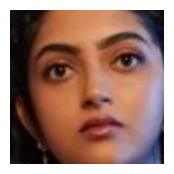

In [3]:
detector = dlib.get_frontal_face_detector()

image_path = "/Users/shankar.selvaraj/Documents/personal/projects/stick_figure_creator/images/personal/test_sag_3.jpeg"
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError("Error: Image not found or could not be loaded.")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = detector(gray_image)

num_faces = len(faces)

if num_faces == 0:
    raise ValueError("Error: No faces detected in the image.")
elif num_faces > 1:
    raise ValueError(
        f"Error: Multiple faces detected ({num_faces} found). Only one face is expected."
    )

x, y, w, h = (faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height())
face = image_rgb[y : y + h, x : x + w]

plt.figure(figsize=(2, 2))
plt.imshow(face)
plt.axis("off")
plt.show()

### Merge pics

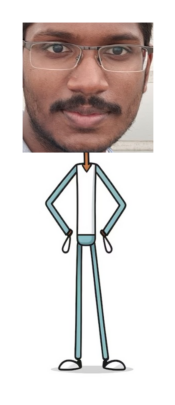

In [5]:
detector = dlib.get_frontal_face_detector()


def detect_face(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError("Error: Image not found or could not be loaded.")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = detector(gray_image)
    if len(faces) == 0:
        raise ValueError("Error: No faces detected in the image.")
    elif len(faces) > 1:
        raise ValueError(
            f"Error: Multiple faces detected ({len(faces)} found). Only one face is expected."
        )

    x, y, w, h = (faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height())
    face = image_rgb[y : y + h, x : x + w]
    return face


face_image_path = "/Users/shankar.selvaraj/Documents/personal/projects/stick_figure_creator/images/personal/test_mad.jpeg"
stick_figure_image_path = "/Users/shankar.selvaraj/Documents/personal/projects/stick_figure_creator/images/stick_figures/test_stick_3.jpeg"

face_image = detect_face(face_image_path)

stick_figure_image = cv2.imread(stick_figure_image_path)
if stick_figure_image is None:
    raise FileNotFoundError("Error: Second image not found or could not be loaded.")

stick_figure_image_rgb = cv2.cvtColor(stick_figure_image, cv2.COLOR_BGR2RGB)

stick_figure_image_resized = cv2.resize(
    stick_figure_image_rgb, (face_image.shape[1], stick_figure_image_rgb.shape[0])
)

combined_image = np.vstack((face_image, stick_figure_image_resized))

canvas_height = combined_image.shape[0] + 50
canvas_width = combined_image.shape[1] + 50
canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255

y_offset = 25
x_offset = (canvas.shape[1] - combined_image.shape[1]) // 2
canvas[
    y_offset : y_offset + combined_image.shape[0],
    x_offset : x_offset + combined_image.shape[1],
] = combined_image

plt.figure(figsize=(3, 5))
plt.imshow(canvas)
plt.axis("off")
plt.show()